# Log Mel Spectrogram

The conventional way of presenting audio signals is by ploting the variation in amplitude along the temporal axis *(waveform)*. This variation is reflecting the variation of air pressure quantity.

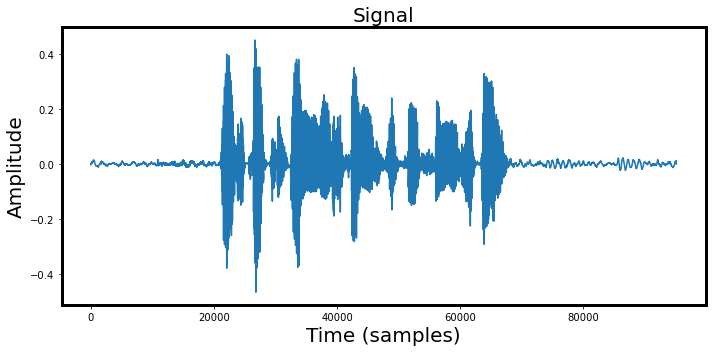

In [13]:
import librosa
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
y, sr = librosa.load('./p252_002_mic1.flac')
ax.plot(y)
ax.set_title('Signal', fontsize=20)
ax.set_xlabel('Time (samples)', fontsize=20)
ax.set_ylabel('Amplitude', fontsize=20)
plt.tight_layout()

Any audio signal is a composition of several single-frequency waves with varying amplitudes. In order to extract these information, we use *Fourier Transform* to decompose the temporal signal into sine and cosine waves that represent the building block of any signal. These single-frequency waves could be used to add up to reconstruct the original signal.

| ![time_freq_signal.png](time_freq_signal.png)|
|:--:|
| <b>Fig.2 - Signal in Time and Frequency domains (From *[Aavos International](https://aavos.eu/glossary/fourier-transform/)*)</b>|

The representation of a signal in the frequency domain is called a *Spectrum* in which we plot the variation in amplitude across the frequency axis instead of time.

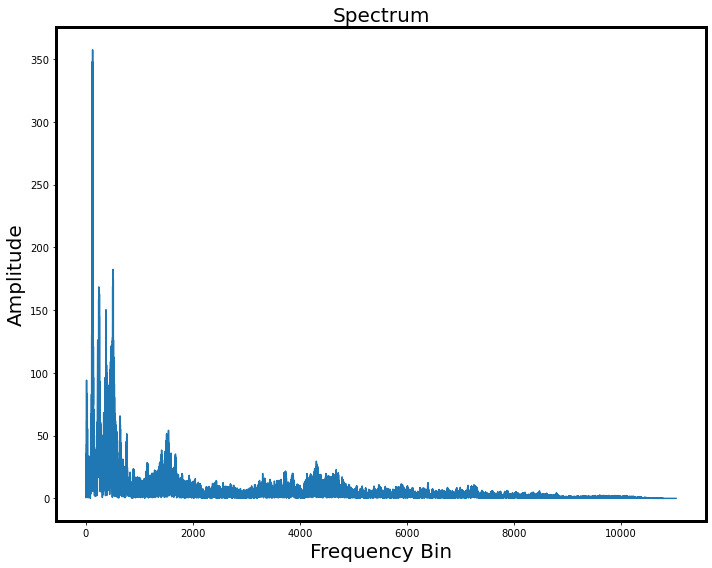

In [23]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
n_fft = 2048
fft_spectrum = np.fft.rfft(y)
freq = np.fft.rfftfreq(y.shape[0], d=1./sr)
fft_spectrum_abs = np.abs(fft_spectrum)
ax.plot(freq, fft_spectrum_abs)
ax.set_title('Spectrum', fontsize=20)
ax.set_xlabel('Frequency Bin', fontsize=20)
ax.set_ylabel('Amplitude', fontsize=20)
plt.tight_layout()

That being said, it is useful to show how the amplitudes of frequencies change across time. Thus, we need to show a 2D representation showing the amplitude variation across freqency and time axes. This presentation called *Spectrogram*. We show the amplitudes in log scale for better visualizetion.

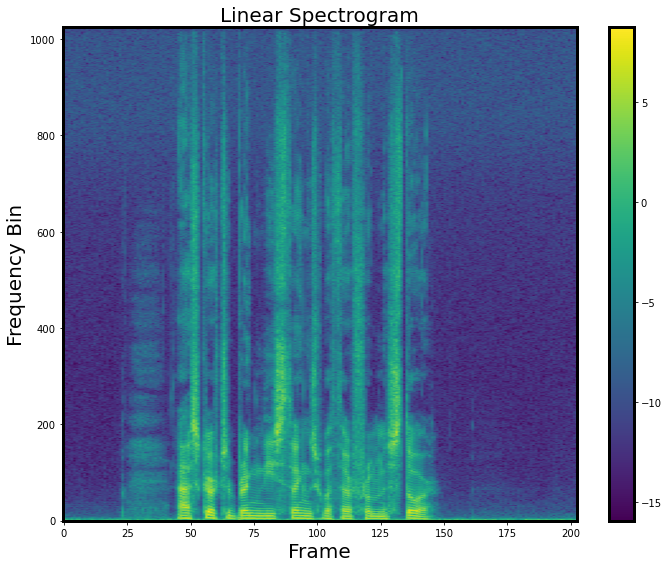

In [39]:
import torch
import torchaudio
import torchaudio.transforms as T
n_fft = 2048
win_length = None
hop_length = 1024
spec_fn = T.Spectrogram(
                n_fft=n_fft,
                win_length=win_length,
                hop_length=hop_length,
                center=True,
                power=2.0,
                )
y, sr = torchaudio.load('./p252_002_mic1.flac')
spec = spec_fn(y).squeeze(0)
log_spec = (spec + torch.finfo().eps).log().squeeze(0)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
im = ax.imshow(log_spec, origin="lower", aspect='auto')
fig.colorbar(im, ax=ax)
ax.set_title('Linear Spectrogram', fontsize=20)
ax.set_xlabel('Frame', fontsize=20)
ax.set_ylabel('Frequency Bin', fontsize=20)
plt.tight_layout()
plt.show()

Additionally, to mimic how humans perceive frequencies, some modifications in the frequency scaling are required. For instance, we don't perceive frequencies on a linear scale. In fact, in 1937, Stevens, Volkmann, and Newmann introduced the mel scale. A scale that accomodate the distances between frequencies to be similar to how we perveive those distances. Hence, we use the *Mel-spectrogram*, with ammplitudes in log scale, as an adequate representation of audio signals.

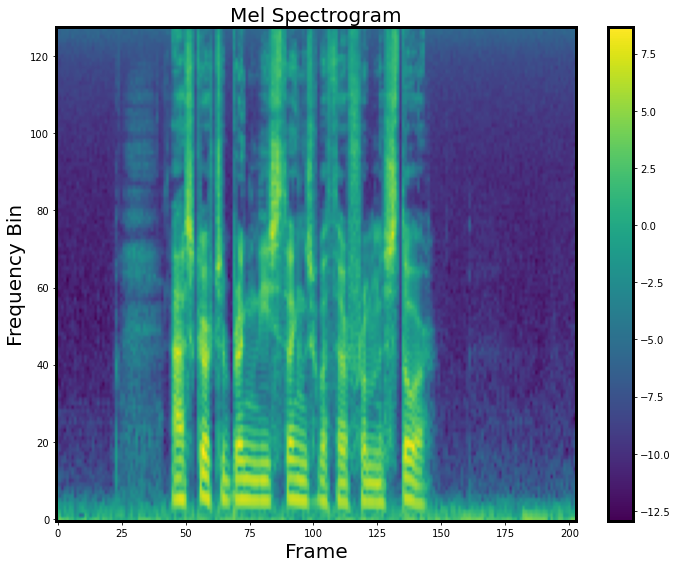

In [40]:
mel_spec_fn = T.MelSpectrogram(
                        sample_rate=sr,
                        n_fft=n_fft,
                        win_length=win_length,
                        hop_length=hop_length,
                        n_mels=128,
                        f_min=5,
                        f_max=20000,
                        power=2,
                        )
mel_spec = mel_spec_fn(y).squeeze(0)
log_mel_spec = (mel_spec + torch.finfo().eps).log().squeeze(0)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
im = ax.imshow(log_mel_spec, origin="lower", aspect='auto')
fig.colorbar(im, ax=ax)
ax.set_title('Mel Spectrogram', fontsize=20)
ax.set_xlabel('Frame', fontsize=20)
ax.set_ylabel('Frequency Bin', fontsize=20)
plt.tight_layout()
plt.show()

In the upcoming experiments, we used *Log-Mel-Spectrograms* as an example for handcrafted features to analyze speaker identity. Accrodingly, we extracted a 128-band log-mel magnitude coefficients using a sampling rate of 16 kHz with number of FFT samples of 2048 and hop size of 512. All spectrograms were generated within a frequency range of 5 to 20,000 Hz.